In [1]:
import cv2 as cv
import math
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('./data/boards/circular/100_0539.jpg', 0)
img = cv.medianBlur(img,5)

In [3]:
ret,th1 = cv.threshold(img,64,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv.THRESH_BINARY_INV,11,2)

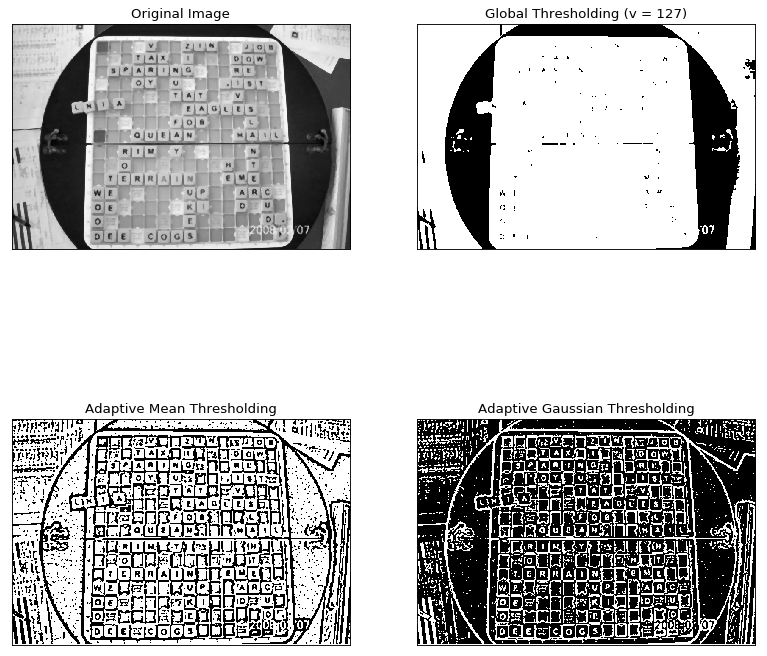

In [4]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(12, 12), dpi=80)
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
# plt.show()

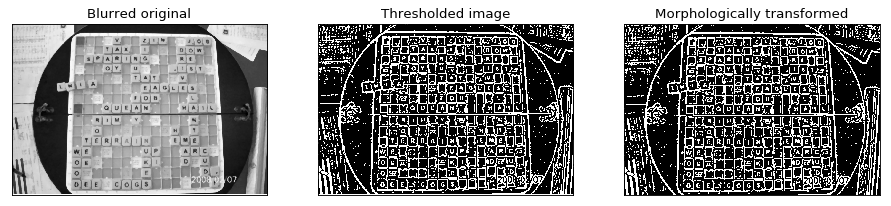

In [5]:
kernel = np.ones((5,5),np.uint8)

# Erode:
# tf = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel, 2)
# tf = cv.dilate(th3, kernel)
tf = th3

plt.figure(figsize=(14, 14), dpi=80)
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Blurred original'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(th3, cmap='gray')
plt.title('Thresholded image'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(tf, cmap='gray')
plt.title('Morphologically transformed'), plt.xticks([]), plt.yticks([])
plt.show()

how many lines 140 (140, 1, 4)


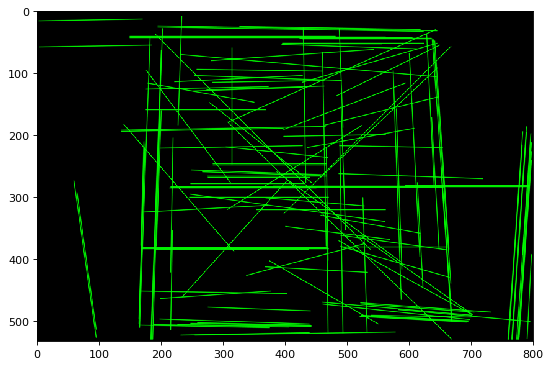

In [6]:
minLineLength = max(img.shape[0], img.shape[1]) / 5
maxLineGap = minLineLength / 10

lines_image = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)

lines = cv.HoughLinesP(tf, 1, math.pi/180.0, 40, np.array([]), minLineLength, maxLineGap)
print('how many lines', len(lines), lines.shape)

a,b,c = lines.shape
for i in range(a):
    cv.line(lines_image, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), 
            (0, 255, 0), 1, cv.LINE_AA)

plt.figure(figsize=(8,6), dpi=80)
plt.imshow(lines_image)

how many lines 48 (48, 1, 4)


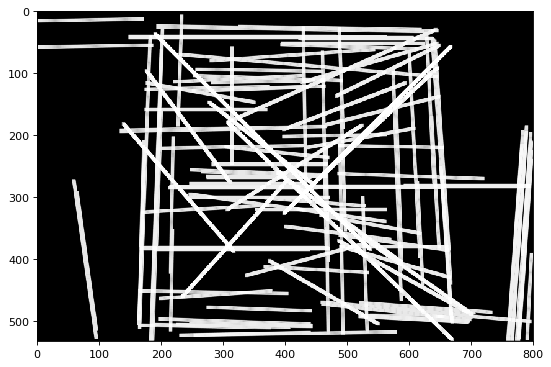

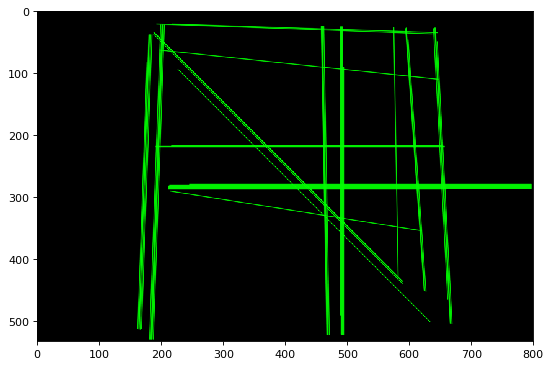

In [7]:
gray = lines_image.copy()
gray = cv.cvtColor(gray, cv.COLOR_RGB2GRAY);

# Dilate again. We are going to do one more edge-find because 
# we want to ensure the rectangular outline is continuous.
gray = cv.dilate(gray, kernel, 100)

plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(gray, 'gray')
# (_,contours,_) = cv.findContours(gray, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# print ('contours found', len(contours))
# for contour in contours:
#     rect = cv.boundingRect(contour)
#     cv.rectangle(new_image, (rect[0],rect[1]), (rect[2]+rect[0],rect[3]+rect[1]), (0,255,0), 2)
# plt.figure(figsize=(8,6), dpi=80)
# plt.imshow(new_image)

# This time, we will be pickier with the line lengths.
minLineLength = 400
maxLineGap = 10

new_lines_image = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)

lines = cv.HoughLinesP(gray, 1, math.pi/180.0, 40, np.array([]), minLineLength, maxLineGap)
print('how many lines', len(lines), lines.shape)

a,b,c = lines.shape
for i in range(a):
    cv.line(new_lines_image, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 255, 0), 1, cv.LINE_AA)

plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(new_lines_image, 'gray')